# 4. Evaluation

## 4.1 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from Classification import Classification
from Ensemble import Ensemble

C:\Users\candy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
sns.set_context('poster')

In [3]:
x_train = pd.read_csv('Data/3.x_train_data.csv')
y_train = pd.read_csv('Data/3.y_train_data.csv')

In [4]:
x_test = pd.read_csv('Data/4.x_test_data.csv')
y_test = pd.read_csv('Data/4.y_test_data.csv')

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7524, 138)
(7524, 1)
(1881, 138)
(1881, 1)


In [6]:
df = pd.read_csv('Data/4.all_models.csv')

## 4.2 Best Model Selection

I focused on 3 factors of defining a good model:

1. Good Validation Accuracy
2. Good Training Accuracy
3. Small Difference between Training and Validation Accuracy

In [7]:
df

Model Name  Train Accuracy  Validation Accuracy  \
0        Decision Tree        0.405458             0.349282   
1        Random Forest        0.574340             0.471026   
2  Logistic Regression        0.563530             0.491760   
3                  SVM        0.570441             0.490696   
4          Naive Bayes        0.390218             0.387560   
5                  KNN        0.510190             0.477937   
6             AdaBoost        0.528088             0.486443   
7              XGBoost        0.800106             0.493355   
8               Voting        0.707248             0.491760   
9             Stacking        0.752791             0.501329   

   Accuracy Difference  
0             0.056176  
1             0.103314  
2             0.071770  
3             0.079745  
4             0.002658  
5             0.032252  
6             0.041645  
7             0.306752  
8             0.215488  
9             0.251462

I chose the logistic regression model as my best model, because it has the second highest validation accuracy with only around 7% drop from train to validation in accuracy. I wanted to minimise overfitting and make the model as reusable as possible. logistic regression achieved a reasonble training accuracy as well, although it did not reach the level of some of the ensemble techniques.

In [8]:
best_model = pickle.load(open('Models/Logistic Regression.pkl','rb'))

## 4.3 Best Model Tested

I next tested the best model with the earlier saved test data. The model managed to get a higher test accuracy, than it did with validation data from the model training stage. This is very good, proving that prioritising a high validation score, and minimising the difference between train and validation accuracy, has helped it classify new review texts very well.

In [9]:
best_model.get_test_scores(x_test,y_test)

Model Name  Train Accuracy  Validation Accuracy  \
0  Logistic Regression         0.56353             0.511962   

   Accuracy Difference  
0             0.051568

1         2         3         4         5
precision  0.548926  0.419540  0.496835  0.475219  0.586813
recall     0.611702  0.411268  0.417553  0.419023  0.693506
f1-score   0.578616  0.415363  0.453757  0.445355  0.635714

## 4.4 Deeper Dive Into Best Model

Looking at the precision, recall, and f1 score, I also noticed the scores were higher around scores of 1 and 5, less for 2 and 4, and the least for 3. This shows that the models performs well on more extreme opinions on reviews than mixed opinions.

In [10]:
best_model.classification_report

1         2         3         4         5
precision  0.549398  0.426036  0.426036  0.445013  0.588972
recall     0.598425  0.373057  0.382979  0.486034  0.618421
f1-score   0.572864  0.397790  0.403361  0.464619  0.603338

Looking into different metrics and deeper into my best model; Logistic Regression, I learnt that most the False Postives came from close misses (e.g. predicting a score of 4 for a true score of 5). This is best shown by these two confusion matrixes (validation and test). 

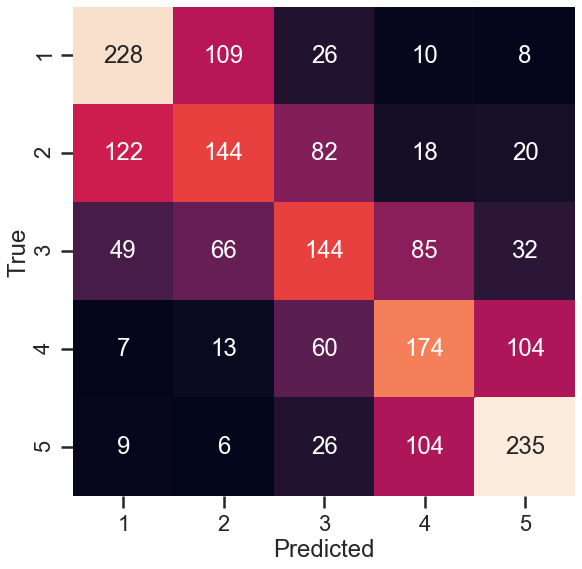

In [11]:
best_model.conf_matrix()

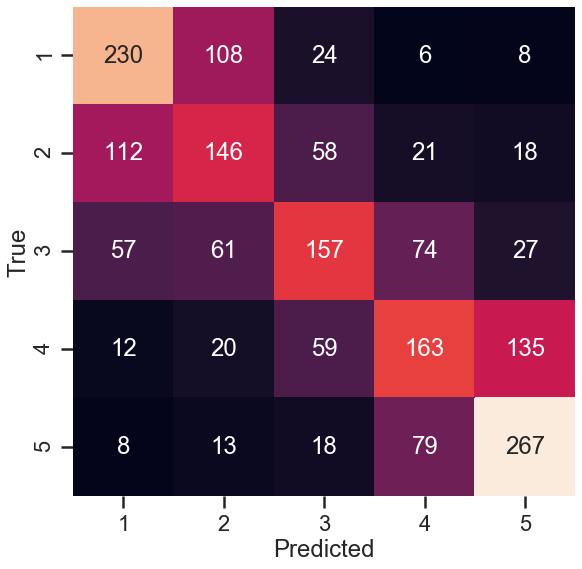

In [12]:
best_model.test_conf_matrix()

The adjacent squares of the diagonal going across the confusion matrix, shows that the model's second highest prediction, for a given class (review score) is always a review score that is +- the true score.
Very few reviews that have a score of 5, have been predicted to have a score of 1 or 2. This is very relieving to know, the majority of the error for the model, is no different to the error a human may make classifying a review to a score with a scale of 1-5.

## 4.5 Application Deployability

### 4.5.1 Deployability?

- most errors were near misses (e.g. 5 predicted as 4)
- extreme scores (1 and 5) were relatively accurate
- comparable to human prediction
- reusable and consistent

Given the classifcation problem is 5 way multi-class one and the adjacent classes can have overlap in the english language even to humans, this model I have created can be deployed.

### 4.5.2 Future Improvements

- Model using RNN and LSTMs - see if better accuracy can be achieved
- Create a working application to test new reviews written by people
- Try a different pre-processing approach and see if model performances change
- Bring in new sources of data to see if there are significant differences on frequent words used